<a href="https://colab.research.google.com/github/GulnazaS/test_case/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import tempfile
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from google.colab import files
%matplotlib inline

In [2]:
import warnings
# Отключение предупреждений
warnings.filterwarnings('ignore')

In [7]:
!pip install -q kaggle

In [3]:
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"gulnazsakhapova","key":"703ad7f01b56080e4671f9a2014dd42d"}'}

In [11]:
!cp kaggle.json ~/.kaggle/

In [12]:
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d gulnazsakhapova/test-case


 99% 1.77G/1.79G [00:21<00:00, 108MB/s]
100% 1.79G/1.79G [00:21<00:00, 90.0MB/s]


In [14]:
!unzip test-case.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: train/train/FRONTAL/10406_frontal.png  
  inflating: train/train/FRONTAL/10407_frontal.png  
  inflating: train/train/FRONTAL/10408_frontal.png  
  inflating: train/train/FRONTAL/10409_frontal.png  
  inflating: train/train/FRONTAL/10410_frontal.png  
  inflating: train/train/FRONTAL/10411_frontal.png  
  inflating: train/train/FRONTAL/10412_frontal.png  
  inflating: train/train/FRONTAL/10413_frontal.png  
  inflating: train/train/FRONTAL/10414_frontal.png  
  inflating: train/train/FRONTAL/10415_frontal.png  
  inflating: train/train/FRONTAL/10416_frontal.png  
  inflating: train/train/FRONTAL/10417_frontal.png  
  inflating: train/train/FRONTAL/10418_frontal.png  
  inflating: train/train/FRONTAL/10419_frontal.png  
  inflating: train/train/FRONTAL/10420_frontal.png  
  inflating: train/train/FRONTAL/10421_frontal.png  
  inflating: train/train/FRONTAL/10422_frontal.png  
  inflating: train/train/FRONTA

In [81]:
batch_size = 256
image_size = (100, 100)

In [82]:
train_dataset = image_dataset_from_directory('/content/train/train',
                                             subset = 'training',
                                             seed = 42,
                                             validation_split = 0.2,
                                             batch_size = batch_size,
                                             image_size = image_size)

Found 4187 files belonging to 3 classes.
Using 3350 files for training.


In [83]:
validation_dataset = image_dataset_from_directory('/content/validation/validation',
                                             subset = 'validation',
                                             seed = 42,
                                             validation_split = 0.2,
                                             batch_size = batch_size,
                                             image_size = image_size)

Found 999 files belonging to 3 classes.
Using 199 files for validation.


In [84]:
class_names = train_dataset.class_names
class_names

['FRONTAL', 'LATERAL', 'TRASH']

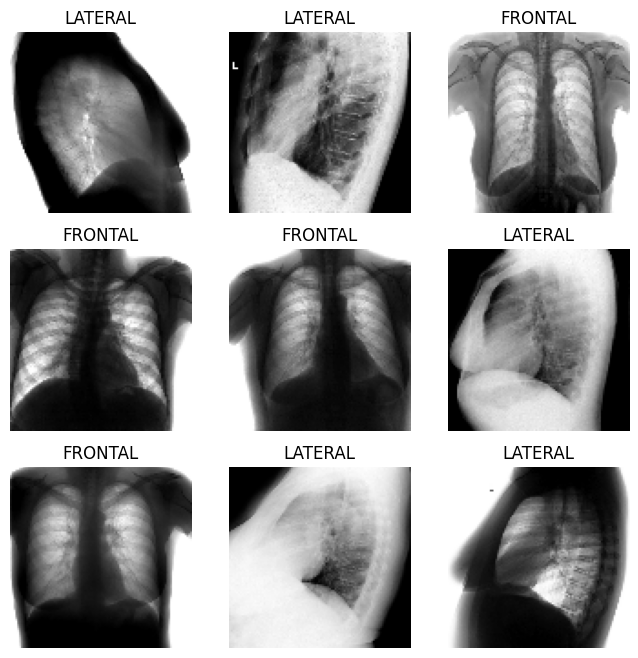

In [ ]:
plt.figure(figsize=(8,8))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [25]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size= AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size= AUTOTUNE)

In [206]:
model = Sequential()

model.add(Conv2D(16, (5,5), padding = 'same', input_shape=(100, 100, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (5,5), padding = 'same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (5,5), padding = 'same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (5,5), padding = 'same', activation='relu'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(3, activation='softmax'))

In [207]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [208]:
history = model.fit(train_dataset,
                    validation_data = validation_dataset,
                    epochs = 15,
                    verbose = 2)
                    #callbacks =[early_stopping_callback])

Epoch 1/15
14/14 - 94s - loss: 2.3162 - accuracy: 0.3513 - val_loss: 1.0818 - val_accuracy: 0.3869 - 94s/epoch - 7s/step
Epoch 2/15
14/14 - 92s - loss: 1.0395 - accuracy: 0.4457 - val_loss: 0.9644 - val_accuracy: 0.5226 - 92s/epoch - 7s/step
Epoch 3/15
14/14 - 104s - loss: 0.9147 - accuracy: 0.5269 - val_loss: 0.8690 - val_accuracy: 0.5678 - 104s/epoch - 7s/step
Epoch 4/15
14/14 - 97s - loss: 0.7463 - accuracy: 0.6263 - val_loss: 0.8681 - val_accuracy: 0.6533 - 97s/epoch - 7s/step
Epoch 5/15
14/14 - 92s - loss: 0.5967 - accuracy: 0.7128 - val_loss: 0.9305 - val_accuracy: 0.7186 - 92s/epoch - 7s/step
Epoch 6/15
14/14 - 92s - loss: 0.4814 - accuracy: 0.8322 - val_loss: 0.9588 - val_accuracy: 0.7990 - 92s/epoch - 7s/step
Epoch 7/15
14/14 - 90s - loss: 0.4013 - accuracy: 0.8699 - val_loss: 0.7849 - val_accuracy: 0.8040 - 90s/epoch - 6s/step
Epoch 8/15
14/14 - 91s - loss: 0.3313 - accuracy: 0.9099 - val_loss: 0.5878 - val_accuracy: 0.8090 - 91s/epoch - 7s/step
Epoch 9/15
14/14 - 94s - loss:

In [209]:
scores = model.evaluate(validation_dataset, verbose=1)
print(f"Доля верных ответов на тестовых данных {scores[1]*100}%")

1/1 [==============================] - 10s 10s/step - loss: 1.3647 - accuracy: 0.8643
Доля верных ответов на тестовых данных 86.43215894699097%


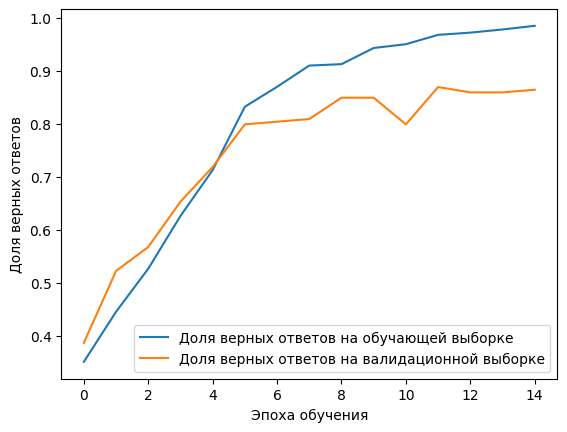

In [210]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающей выборке')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на валидационной выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

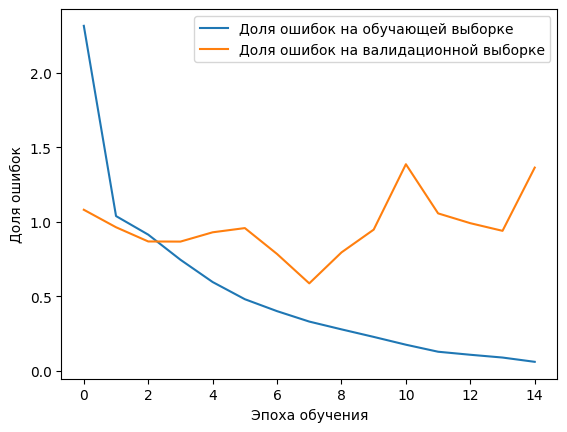

In [211]:
plt.plot(history.history['loss'],
         label='Доля ошибок на обучающей выборке')
plt.plot(history.history['val_loss'],
         label='Доля ошибок на валидационной выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля ошибок')
plt.legend()
plt.show()

In [212]:
#Сохранение модели
model.save('test_case.h5')

In [213]:
#Сохранение модели на локальный компьютер
files.download('test_case.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [219]:
#Сохранение весов
model.save_weights('test_case_weights.h5')

In [220]:
import os

# Указываем путь к директории
val_front_directory = "/content/validation/validation/FRONTAL"
val_trash_directory = "/content/validation/validation/TRASH"
val_lateral_directory = "/content/validation/validation/LATERAL"
# Получаем список файлов
files = os.listdir(val_front_directory )+os.listdir(val_trash_directory )+os.listdir(val_lateral_directory )

# Выводим список файлов
print(files)

['100121.png', '10156_frontal.png', '1.3.6.1.4.1.39687.1.5030630519593595057.11820461060905501116.png', '1.3.6.1.4.1.39687.1.5037527467765658181.1027548510860168892.png', '10138_frontal.png', '10080_frontal.png', '10018_frontal.png', '10172_frontal.png', '10165_frontal.png', '10022_frontal.png', '10193_frontal.png', '10157_frontal.png', '1.3.6.1.4.1.39687.1.5388518239421847345.15510718655640767403.png', '10061_frontal.png', '1.3.6.1.4.1.39687.1.5349873396051332436.1327070554656351890.png', '100249.png', '1.3.6.1.4.1.39687.1.4869222751269732658.18247440803468042383.png', '10103_frontal.png', '1.3.6.1.4.1.39687.1.5150220686474065558.14251671043252021436.png', '10195_frontal.png', '10207_frontal.png', '10148_frontal.png', '10155_frontal.png', '10175_frontal.png', '101874.png', '1.3.6.1.4.1.39687.1.5169696644123475960.1927852113416909731.png', '1.3.6.1.4.1.39687.1.5416755190285620117.7391913115736024220.png', '10009_frontal.png', '1.3.6.1.4.1.39687.1.5563386466475496748.3157577676511884685

In [221]:
model = tf.keras.models.load_model('test_case.h5')

In [222]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 100, 100, 16)      1216      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 50, 50, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 50, 50, 32)        12832     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 25, 25, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 25, 25, 64)        51264     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 12, 12, 64)       

In [233]:
f = files.upload()

Saving 1.2.392.200036.9116.1.1.1.1.11220621.20211201095216.jpg to 1.2.392.200036.9116.1.1.1.1.11220621.20211201095216.jpg


In [234]:
img_path = '1.2.392.200036.9116.1.1.1.1.11220621.20211201095216.jpg'

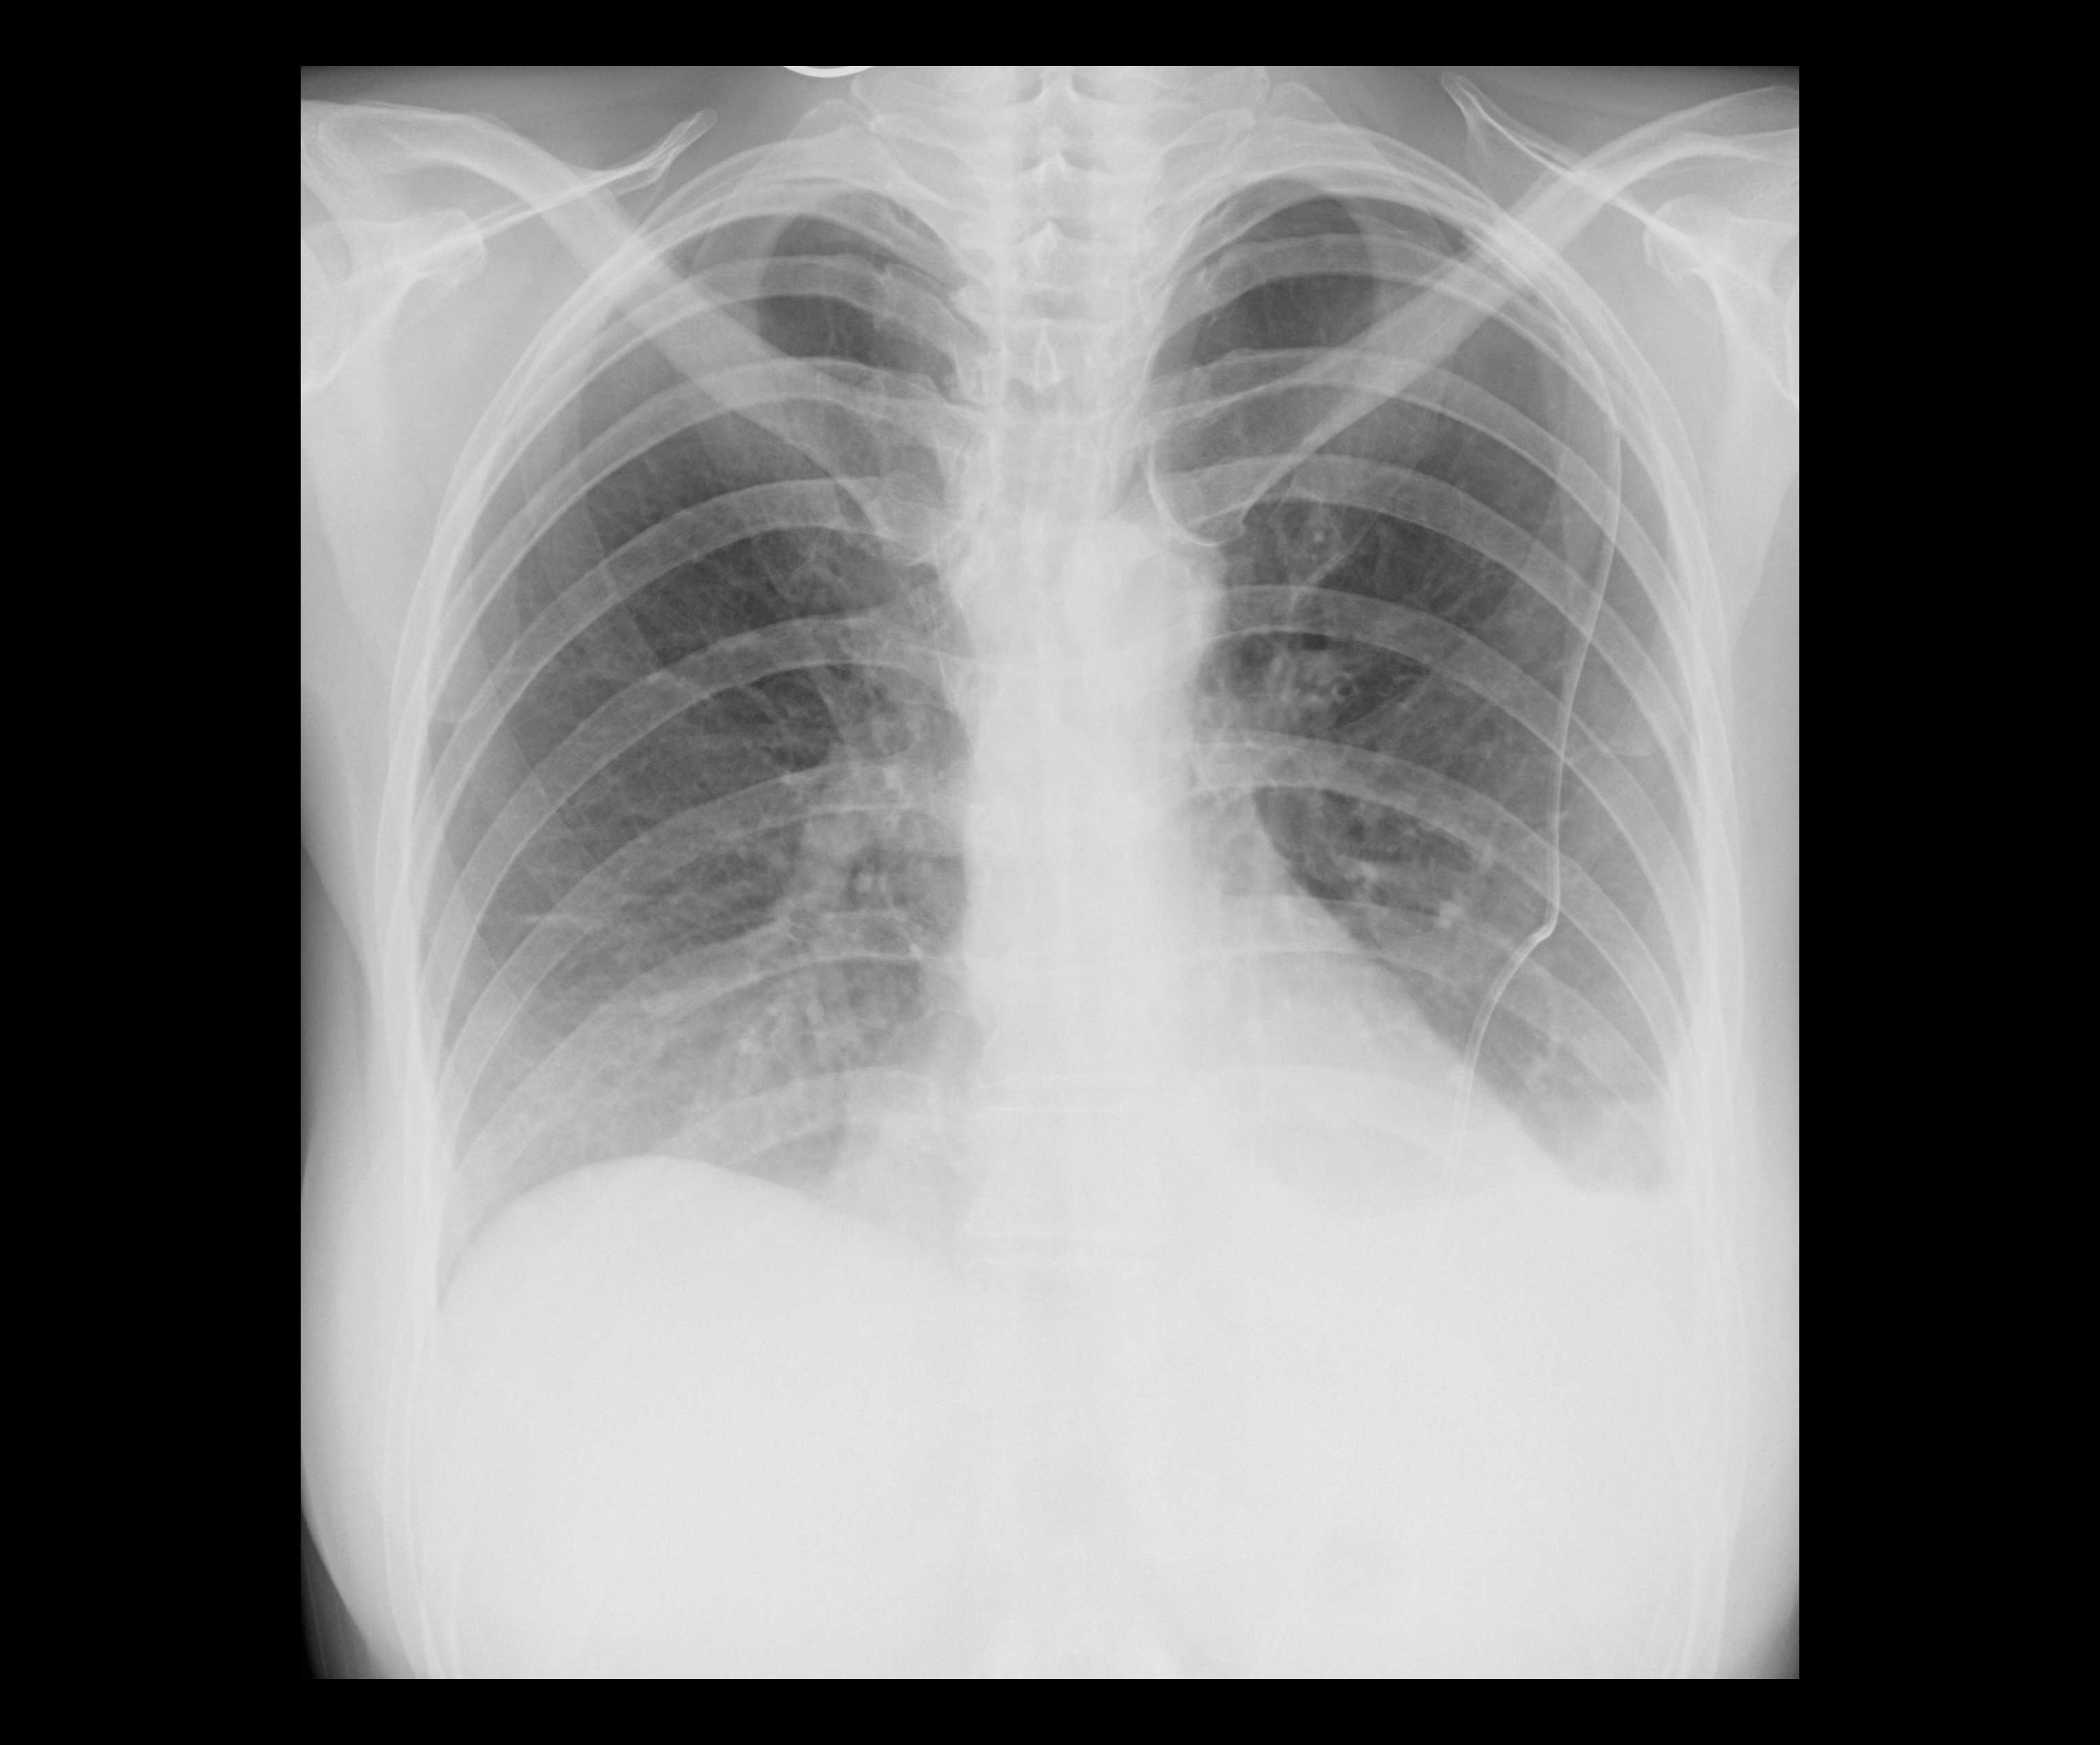

In [235]:
from IPython.display import Image
from tensorflow.keras.preprocessing import image
import numpy as np
Image(img_path, width=100, height=100)

In [236]:
classes = validation_dataset.class_names

In [237]:
img = image.load_img(img_path, target_size=(100, 100), color_mode = "grayscale")

In [244]:
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Получаем предсказание
predictions = model.predict(img_array)

# Печатаем результат
print(predictions)

1/1 [==============================] - 0s 28ms/step
[[8.4413813e-12 2.4943434e-09 1.0000000e+00]]


In [252]:
import os
import pandas as pd

# Путь к папке с изображениями
val_directory = "/content/validation/validation/FRONTAL"

# Получить список файлов в папке
file_names = os.listdir(val_directory )

# Создать датафрейм с названиями файлов
df = pd.DataFrame({'id': file_names})

# Записать датафрейм в CSV файл
output_file = "ids.csv"
df.to_csv(output_file, index=False)

print(f"CSV файл с названиями изображений создан: {output_file}")

CSV файл с названиями изображений создан: ids.csv


In [253]:
# Путь к папке с изображениями
val_trash_directory = "/content/validation/validation/TRASH"

# Получить список файлов в папке
file_names = os.listdir(val_trash_directory )

# Создать датафрейм с названиями файлов
df = pd.DataFrame({'id': file_names})

# Записать датафрейм в CSV файл
output_file = "ids_trash.csv"
df.to_csv(output_file, index=False)

print(f"CSV файл с названиями изображений создан: {output_file}")

CSV файл с названиями изображений создан: ids_trash.csv


In [254]:
# Путь к папке с изображениями
val_lateral_directory = "/content/validation/validation/LATERAL"

# Получить список файлов в папке
file_names = os.listdir(val_lateral_directory )

# Создать датафрейм с названиями файлов
df = pd.DataFrame({'id': file_names})

# Записать датафрейм в CSV файл
output_file = "ids_lateral.csv"
df.to_csv(output_file, index=False)

print(f"CSV файл с названиями изображений создан: {output_file}")

CSV файл с названиями изображений создан: ids_lateral.csv


In [255]:
df1 = pd.read_csv("ids.csv")
df2 = pd.read_csv("ids_trash.csv")
df3 = pd.read_csv("ids_lateral.csv")

# Объединить датафреймы в один
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Сохранить объединенный датафрейм в новый CSV файл
output_file = "val_id.csv"
combined_df.to_csv(output_file, index=False)

In [256]:
df = pd.read_csv("val_id.csv")

In [265]:
import os
import numpy as np
from keras.preprocessing import image

img_dir = '/content/validation/validation/FRONTAL'

predictions_list = []
for file in os.listdir(img_dir):
  if file.endswith(".jpg") or file.endswith(".png"):  # Проверяем, что файл является изображением
    img_path = os.path.join(img_dir, file)  # Получаем путь к файлу
    img = image.load_img(img_path, target_size=(100, 100))  # Загружаем изображение и меняем размер на 100x100
    img_array = image.img_to_array(img)  # Преобразуем изображение в массив numpy
    img_array = np.expand_dims(img_array, axis=0)  # Расширяем размерность массива для предсказания
    predictions = model.predict(img_array)
    predictions_list.append((file, predictions))  # Добавляем имя файла и предсказание в список

print(predictions_list)

1/1 [==============================] - 0s 27ms/step
[('100121.png', array([[1.0000000e+00, 3.7669976e-12, 1.3953967e-09]], dtype=float32)), ('10156_frontal.png', array([[1.0000000e+00, 1.4121421e-23, 1.1047249e-18]], dtype=float32)), ('1.3.6.1.4.1.39687.1.5030630519593595057.11820461060905501116.png', array([[3.3771168e-04, 3.7324280e-03, 9.9592990e-01]], dtype=float32)), ('1.3.6.1.4.1.39687.1.5037527467765658181.1027548510860168892.png', array([[3.2881217e-04, 4.2323824e-03, 9.9543887e-01]], dtype=float32)), ('10138_frontal.png', array([[1.0000000e+00, 2.2414132e-14, 2.3982488e-11]], dtype=float32)), ('10080_frontal.png', array([[9.9999988e-01, 8.0984713e-10, 9.5583708e-08]], dtype=float32)), ('10018_frontal.png', array([[1.0000000e+00, 1.3392007e-10, 2.3505745e-08]], dtype=float32)), ('10172_frontal.png', array([[1.0000000e+00, 1.0563480e-14, 1.4295436e-11]], dtype=float32)), ('10165_frontal.png', array([[1.0000000e+00, 9.9827169e-12, 3.5508139e-09]], dtype=float32)), ('10022_frontal

In [267]:
import csv

with open('predictions.csv', mode='w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(['File Name', 'Prediction'])
  for item in predictions_list:
    writer.writerow([item[0], item[1]])

In [268]:
img_dir = '/content/validation/validation/TRASH'

predictions_list_trash = []
for file in os.listdir(img_dir):
  if file.endswith(".jpg") or file.endswith(".png"):  # Проверяем, что файл является изображением
    img_path = os.path.join(img_dir, file)  # Получаем путь к файлу
    img = image.load_img(img_path, target_size=(100, 100))  # Загружаем изображение и меняем размер на 100x100
    img_array = image.img_to_array(img)  # Преобразуем изображение в массив numpy
    img_array = np.expand_dims(img_array, axis=0)  # Расширяем размерность массива для предсказания
    predictions = model.predict(img_array)
    predictions_list.append((file, predictions))  # Добавляем имя файла и предсказание в список

print(predictions_list_trash)

1/1 [==============================] - 0s 28ms/step
[]


In [269]:
import csv

with open('predictions_trash.csv', mode='w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(['File Name', 'Prediction'])
  for item in predictions_list:
    writer.writerow([item[0], item[1]])

In [270]:
img_dir = '/content/validation/validation/LATERAL'

predictions_list_lateral = []
for file in os.listdir(img_dir):
  if file.endswith(".jpg") or file.endswith(".png"):  # Проверяем, что файл является изображением
    img_path = os.path.join(img_dir, file)  # Получаем путь к файлу
    img = image.load_img(img_path, target_size=(100, 100))  # Загружаем изображение и меняем размер на 100x100
    img_array = image.img_to_array(img)  # Преобразуем изображение в массив numpy
    img_array = np.expand_dims(img_array, axis=0)  # Расширяем размерность массива для предсказания
    predictions = model.predict(img_array)
    predictions_list.append((file, predictions))  # Добавляем имя файла и предсказание в список

print(predictions_list_lateral)

1/1 [==============================] - 0s 25ms/step
[]


In [276]:
import csv

with open('predictions_lateral.csv', mode='w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(['File Name', 'Prediction'])
  for item in predictions_list:
    writer.writerow([item[0], item[1]])

In [278]:
df1 = pd.read_csv("predictions.csv")
df2 = pd.read_csv("predictions_trash.csv")
df3 = pd.read_csv("predictions_lateral.csv")

# Объединить датафреймы в один
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Сохранить объединенный датафрейм в новый CSV файл
output_file = "prediction.csv"
combined_df.to_csv(output_file, index=False)

In [299]:
df = pd.read_csv("prediction.csv")

In [289]:
df

,File Name,Prediction
0,100121.png,[[1.0000000e+00 3.7669976e-12 1.3953967e-09]]
1,10156_frontal.png,[[1.0000000e+00 1.4121421e-23 1.1047249e-18]]
2,1.3.6.1.4.1.39687.1.5030630519593595057.118204...,[[3.3771168e-04 3.7324280e-03 9.9592990e-01]]
3,1.3.6.1.4.1.39687.1.5037527467765658181.102754...,[[3.2881217e-04 4.2323824e-03 9.9543887e-01]]
4,10138_frontal.png,[[1.0000000e+00 2.2414132e-14 2.3982488e-11]]
...,...,...
2323,10114_lateral.png,[[6.3151240e-18 1.0000000e+00 1.8101455e-14]]
2324,10060_lateral.png,[[3.9184329e-12 1.0000000e+00 7.8189305e-10]]
2325,10462_lateral.png,[[5.4509704e-14 1.0000000e+00 3.7045114e-11]]
2326,10432_lateral.png,[[3.5517956e-13 1.0000000e+00 1.2188003e-10]]


In [305]:
split_names = df['Prediction'].str.split(' ', expand=True)

In [306]:
split_names

,0,1,2,3,4,5,6
0,[[1.0000000e+00,3.7669976e-12,1.3953967e-09]],None,None,None,None
1,[[1.0000000e+00,1.4121421e-23,1.1047249e-18]],None,None,None,None
2,[[3.3771168e-04,3.7324280e-03,9.9592990e-01]],None,None,None,None
3,[[3.2881217e-04,4.2323824e-03,9.9543887e-01]],None,None,None,None
4,[[1.0000000e+00,2.2414132e-14,2.3982488e-11]],None,None,None,None
...,...,...,...,...,...,...,...
2323,[[6.3151240e-18,1.0000000e+00,1.8101455e-14]],None,None,None,None
2324,[[3.9184329e-12,1.0000000e+00,7.8189305e-10]],None,None,None,None
2325,[[5.4509704e-14,1.0000000e+00,3.7045114e-11]],None,None,None,None
2326,[[3.5517956e-13,1.0000000e+00,1.2188003e-10]],None,None,None,None
